In [1]:
import numpy as np
import pandas as pd
import os
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import difflib
from collections import Counter

os.chdir('/home/thabib/study_behavior_analysis/')
sys.path.append('/home/thabib/database_records_linkage')

#from metaphone import doublemetaphone
import recordlinkage
from preprocessing.pandas_oper import clean_columns

ROOT = '/home/thabib/database_records_linkage'

# Exploration 

In [82]:
source1 = pd.read_csv(os.path.join(ROOT, 'data', 'source1.csv'))
source2 = pd.read_csv(os.path.join(ROOT, 'data', 'source2.csv'))
display(source1) # 1826169 rows in source 1 with all unique IDs
display(source2) # 3530302 rows in source2 with 1258224 NaN IDs – pd.isna(source2['id']).sum()
                 # 3530302 - 1258224 = 2272078 rows with proper IDs (but with repetitions, see below)

,id,name,street_number,street_type,street_name,address_line2,postal_code,city
0,542012000015,SOCIETE DES SUCRERIES DU MARQUENTERRE,NaN,RUE,DE LA FONTAINE,NaN,80120,RUE
1,542012000031,SOCIETE DES SUCRERIES DU MARQUENTERRE,NaN,RTE,NATIONALE,NaN,62140,MARCONNELLE
2,545011900028,LE GRAND CAFE ET GASSENDI,NaN,NaN,SAINT CHRISTOPHE,ROUTE DE MARSEILLE,4000,DIGNE-LES-BAINS
3,552017600016,HERNAS CARTONNAGE,50.0,RUE,PASTEUR,NaN,80210,FEUQUIERES-EN-VIMEU
4,552017600032,HERNAS CARTONNAGE,NaN,NaN,ZONE DES HAYETTES,NaN,80210,CHEPY
...,...,...,...,...,...,...,...,...
1826164,90771119600010,BIONORMANDE,NaN,RUE,DE LA GRANDE FLANDRE,LOT 1 - 7 A,76270,NEUFCHATEL-EN-BRAY
1826165,90771120400012,AHELA BAT,18.0,RUE,SAINT CLEMENT,NaN,93200,SAINT-DENIS
1826166,90771121200015,DECO BATIMENT,7.0,RUE,AUGUSTE BLANQUI,NaN,93200,SAINT-DENIS
1826167,90760906900014,CHATEAUX MERVEILLES,15.0,RUE,DE MILAN,NaN,75009,PARIS 9


,address,website,id,name
0,"226 r Menthon, 01380 SAINT CYR SUR MENTHON",NaN,NaN,Sandrine Berny
1,"50 rte Bage, 01380 SAINT CYR SUR MENTHON",NaN,8.412263e+13,Sarl Landrix Frères
2,"120 r Menthon, 01380 SAINT CYR SUR MENTHON",NaN,7.913458e+13,Marion Kwasniewski
3,"Moulin 28 chem RUILLAT, 01380 SAINT CYR SUR ME...",NaN,NaN,CLAUDE FONDATION
4,"350 rte Loeze, 01380 SAINT CYR SUR MENTHON",NaN,4.341618e+13,Manigand Stéphane
...,...,...,...,...
3530297,NaN,NaN,8.497810e+13,Jacoby O
3530298,"quart Guardère, 83150 BANDOL",http://agence.carrefourlocation.fr,NaN,Carrefour Location
3530299,"5 r Jardins, 83150 BANDOL",http://aquabike-en-mer.com,7.951850e+13,Calvet Richard
3530300,"54 traverse Laboureur, 83150 BANDOL",http://dolcefarnientebandol.com,5.392586e+13,Dolce Far Niente


#### Removing all entries with NaN IDs from source2 and also removing all duplicate rows + cleaning the columns with string entries

In [94]:
s2_nond = source2.dropna(subset=['id']).drop_duplicates()
s2_nond_cstr = clean_columns(s2_nond, ['address', 'name'])
s1_cstr = clean_columns(source1, ['name', 'street_type', 'street_name', 'address_line2', 'city'])
display(s1_cstr)
display(s2_nond_cstr)

/home/thabib/anaconda3/envs/nlp_siddata/lib/python3.8/site-packages/recordlinkage/preprocessing/cleaning.py:114: FutureWarning: The default value of regex will change from True to False in a future version.
  s = s.str.replace(r'(\[.*?\]|\(.*?\)|\{.*?\})', '')
/home/thabib/anaconda3/envs/nlp_siddata/lib/python3.8/site-packages/recordlinkage/preprocessing/cleaning.py:118: FutureWarning: The default value of regex will change from True to False in a future version.
  s = s.str.replace(replace_by_none, '')
/home/thabib/anaconda3/envs/nlp_siddata/lib/python3.8/site-packages/recordlinkage/preprocessing/cleaning.py:121: FutureWarning: The default value of regex will change from True to False in a future version.
  s = s.str.replace(replace_by_whitespace, ' ')
/home/thabib/anaconda3/envs/nlp_siddata/lib/python3.8/site-packages/recordlinkage/preprocessing/cleaning.py:124: FutureWarning: The default value of regex will change from True to False in a future version.
  s = s.str.replace(r'\s\s+',

,id,name,street_number,street_type,street_name,address_line2,postal_code,city
0,542012000015,societe des sucreries du marquenterre,NaN,rue,de la fontaine,NaN,80120,rue
1,542012000031,societe des sucreries du marquenterre,NaN,rte,nationale,NaN,62140,marconnelle
2,545011900028,le grand cafe et gassendi,NaN,NaN,saint christophe,route de marseille,4000,digne les bains
3,552017600016,hernas cartonnage,50.0,rue,pasteur,NaN,80210,feuquieres en vimeu
4,552017600032,hernas cartonnage,NaN,NaN,zone des hayettes,NaN,80210,chepy
...,...,...,...,...,...,...,...,...
1826164,90771119600010,bionormande,NaN,rue,de la grande flandre,lot 1 7 a,76270,neufchatel en bray
1826165,90771120400012,ahela bat,18.0,rue,saint clement,NaN,93200,saint denis
1826166,90771121200015,deco batiment,7.0,rue,auguste blanqui,NaN,93200,saint denis
1826167,90760906900014,chateaux merveilles,15.0,rue,de milan,NaN,75009,paris 9


,address,website,id,name
1,50 rte bage 01380 saint cyr sur menthon,NaN,8.412263e+13,sarl landrix freres
2,120 r menthon 01380 saint cyr sur menthon,NaN,7.913458e+13,marion kwasniewski
4,350 rte loeze 01380 saint cyr sur menthon,NaN,4.341618e+13,manigand stephane
5,41 r centre 01380 saint cyr sur menthon,http://www.infirmiere-frederique-thevenard.fr,4.885464e+13,frederique thevenard
6,116 chem cochatieres 01380 saint cyr sur menthon,NaN,4.181119e+13,garnier xavier
...,...,...,...,...
3530296,2 av chateau 83150 bandol,NaN,3.013066e+13,carlot jean francois
3530297,NaN,NaN,8.497810e+13,jacoby o
3530299,5 r jardins 83150 bandol,http://aquabike-en-mer.com,7.951850e+13,calvet richard
3530300,54 traverse laboureur 83150 bandol,http://dolcefarnientebandol.com,5.392586e+13,dolce far niente


In [109]:
s2_nond_cstr = s2_nond_cstr.astype({'id': 'Int64'})

In [110]:
len(np.unique(s2_nond_cstr['id']))

2270350

__There are only 2270350 unique IDs in source2 and the remaining 1012 (=2271362 - 2270350) IDs must, therefore, be repititions__

   - _There are 1010 unique IDs that are repeated twice and 1 unique ID is repeated thrice._

In [133]:
s2nond_uids, s2nond_uids_counts = np.unique(np.array(s2_nond_cstr['id']), return_counts=True)
duplicates = s2nond_uids[s2nond_uids_counts > 1]
display(duplicates)
display(len(duplicates))

Counter(s2nond_uids_counts)

array([6480115200089, 7692068500039, 13002792300049, ..., 95750393100561,
       99785860000023, 99882350414085], dtype=object)

1011

Counter({1: 2269339, 2: 1010, 3: 1})

#### How many repeated rows are there in source2 with NAN IDs?

In [114]:
#s2_nod = s2.drop_duplicates()
s2_nanid = source2[~source2.isin(s2_nond_cstr)].dropna(how='all')#.drop_duplicates()
s2_nod_nanid = s2_nanid.drop_duplicates()

#del s2_nod
display(s2_nanid)
display(s2_nod_nanid)

,address,website,id,name
0,"226 r Menthon, 01380 SAINT CYR SUR MENTHON",NaN,NaN,Sandrine Berny
1,"50 rte Bage, 01380 SAINT CYR SUR MENTHON",NaN,NaN,Sarl Landrix Frères
2,"120 r Menthon, 01380 SAINT CYR SUR MENTHON",NaN,NaN,Marion Kwasniewski
3,"Moulin 28 chem RUILLAT, 01380 SAINT CYR SUR ME...",NaN,NaN,CLAUDE FONDATION
4,"350 rte Loeze, 01380 SAINT CYR SUR MENTHON",NaN,NaN,Manigand Stéphane
...,...,...,...,...
3530297,NaN,NaN,NaN,Jacoby O
3530298,"quart Guardère, 83150 BANDOL",http://agence.carrefourlocation.fr,NaN,Carrefour Location
3530299,"5 r Jardins, 83150 BANDOL",NaN,NaN,Calvet Richard
3530300,"54 traverse Laboureur, 83150 BANDOL",NaN,NaN,Dolce Far Niente


,address,website,id,name
0,"226 r Menthon, 01380 SAINT CYR SUR MENTHON",NaN,NaN,Sandrine Berny
1,"50 rte Bage, 01380 SAINT CYR SUR MENTHON",NaN,NaN,Sarl Landrix Frères
2,"120 r Menthon, 01380 SAINT CYR SUR MENTHON",NaN,NaN,Marion Kwasniewski
3,"Moulin 28 chem RUILLAT, 01380 SAINT CYR SUR ME...",NaN,NaN,CLAUDE FONDATION
4,"350 rte Loeze, 01380 SAINT CYR SUR MENTHON",NaN,NaN,Manigand Stéphane
...,...,...,...,...
3530297,NaN,NaN,NaN,Jacoby O
3530298,"quart Guardère, 83150 BANDOL",http://agence.carrefourlocation.fr,NaN,Carrefour Location
3530299,"5 r Jardins, 83150 BANDOL",NaN,NaN,Calvet Richard
3530300,"54 traverse Laboureur, 83150 BANDOL",NaN,NaN,Dolce Far Niente


#### Counting NANs in columns of source1 and 2

In [134]:
s1_cstr['city'].isnull().sum()

0

#### Counting full address (no NANs in any address field) in source1

In [135]:
s1_fulladdress = s1_cstr.dropna(subset=['street_number', 'street_type', 'street_name', 'address_line2'])
s1_fulladdress

,id,name,street_number,street_type,street_name,address_line2,postal_code,city
19,568014500017,promens montoir de bretagne sas,73.0,rue,henri gautier,la providence,44550,montoir de bretagne
29,572078400148,etablissements decayeux,1.0,imp,nicephore niepce,za charles de gaulle,93290,tremblay en france
30,572078400155,etablissements decayeux,7.0,rue,des sarcelles,zone industrielle,80100,abbeville
42,578096000109,societe immobiliere touristique et hoteliere d...,5.0,esp,francois andre,sur plage face hotel hermitage,44500,la baule escoublac
46,582037800031,entreprise demouselle,140.0,rue,du chateau d eau,zone industrielle,80100,abbeville
...,...,...,...,...,...,...,...,...
1826064,90771049500017,gipsy,10.0,rue,de trevise,10 12,75009,paris 9
1826065,90771050300018,meyyartist paris,76.0,av,des champs elysees,76 78,75008,paris 8
1826085,90771083400017,larc batisseur,15.0,av,fernand chatelain,batiment sunset porte 4,95610,eragny
1826150,90771098200014,lapoleone publishing,4.0,rue,galilee,4 6,75116,paris 16


# EDA Summary

__For Source1__

1. Total rows = 1826169
2. Unique rows = 1826169
3. Rows with non-NAN IDs = 1826169
4. Rows with unique non-NAN IDs = 1826169


5. NANs in 'name' = 2
6. Full addresses (no NANs in any of the address fields) = 270690




__For Source2__
1. Total rows = 3530302
2. Unique rows = 3528618 
3. Rows with non-NAN IDs = 2272078 
4. Rows with NAN IDs = 1257964
5. Rows left after removing duplicate rows and NAN IDs = 2271362. 
6. Rows with unique non-NAN IDs = 2270350.
7. Number of rows with repetitions of IDs = 2271362-2270350 = 1012 _{1010 IDs repeating twice, 1 ID repeating thrice}_


(For s2_nond_cstr)

8. NANs in 'address' = 10448, with 754 common with source1 (on IDs)
9. NANs in 'name' = 6
10. NANs in 'website' = 1320267



__Source1 + Source2__

1. Number of (unique) IDs common to both = 780883
2. Hence, there are 1045286 rows in source1 (_not in source2_) which have a unique IDs but missing values of different address fields and name etc.
3. Also, there are 1490479 (=2271362-780883) rows in source2 (_not in source1_) which have (non-NAN) IDs (1489467 (=2270350-780883) unique) but missing values in 'address' and 'name' fields.


#### Checking if the entries are the same for IDs that are repeated (it is given above that they can be considered the same)

In [136]:
s2_nond_cstr[s2_nond_cstr['id'] == 99785860000023]

,address,website,id,name
2255547,rte de remalard lieu dit tuilot 61400 mortagne...,http://www.intermarche.com/home.html,99785860000023,intermarche station service
2255597,rte de remalard lieu dit tuilot 61400 mortagne...,NaN,99785860000023,intermarche


In [116]:
s2_nond_cstr[s2_nond_cstr['id'] == 6480115200089]

,address,website,id,name
655852,parc du banian 75 montee st menet 13011 marseille,http://www.fidecompta.fr,6480115200089,fidecompta
655899,75 montee st menet 13011 marseille,NaN,6480115200089,fiduciaire expertise comptable


In [117]:
s2_nond_cstr[s2_nond_cstr['id'] == 38990291700019]

,address,website,id,name
346816,av bamberg 12000 rodez,https://location.intermarche.com/site/,38990291700019,intermarche location rodez
503674,av bamberg 12000 rodez,https://location.intermarche.com,38990291700019,intermarche location rodez
566976,av bamberg 12000 rodez,http://www.intermarche.com/home.html,38990291700019,intermarche super


#### Constructing a dictionary with counter for each unique IDs number of occurences

In [118]:
dict_ids_counts = Counter(np.array(s2_nond_cstr['id']))


# Put IDs with 2 or more occurences in a list
s2nond_rep_ids = []
for k,v in dict_ids_counts.items():
    if v == 2 or v==3:
        s2nond_rep_ids.append(k)

### Checking how many of these repeating IDs from 's2_nond' are in 's1'

In [119]:
s2nond_rep_ids_in_s1, _ , s1_rep_idx = np.intersect1d(s2nond_rep_ids, s1_cstr['id'], return_indices=True)

In [120]:
display(s2nond_rep_ids_in_s1)
len(s1_rep_idx)

array([ 6480115200089,  7692068500039, 19762093300014, 20005562200084,
       20005684400521, 21050036900017, 21100117700057, 21130077700177,
       21130102300126, 21170415000187, 21250370000032, 21250453400042,
       21260148800043, 21260165200010, 21260170200039, 21260252800136,
       21270375500166, 21270562800023, 21280005600013, 21280051000027,
       21280358900028, 21280380300023, 21280387800025, 21290233200098,
       21290262100011, 21300008600024, 21310104100027, 21310375700091,
       21310396300020, 21310424300034, 21310495300020, 21310587700012,
       21320117100021, 21320160100027, 21330003100035, 21330029600026,
       21330153400029, 21330357100029, 21360182600059, 21380006300017,
       21440143200064, 21490223100148, 21510185800029, 21510602200241,
       21510614700022, 21590158800016, 21740133000030, 21760157400114,
       21760157400239, 21780015000096, 21780123200083, 21780123200133,
       21780380800062, 21830086100034, 21860093000018, 22720002900055,
      

421

- The following thrice-repeating-ID entry from source2 has quite a bit of variation in various fields in the two tables!

In [137]:
display(s1_cstr[s1_cstr['id']==38990291700019])
display(s2_nond_cstr[s2_nond_cstr['id']==38990291700019])

,id,name,street_number,street_type,street_name,address_line2,postal_code,city
426935,38990291700019,janeli,NaN,av,de bamberg,NaN,12000,rodez


,address,website,id,name
346816,av bamberg 12000 rodez,https://location.intermarche.com/site/,38990291700019,intermarche location rodez
503674,av bamberg 12000 rodez,https://location.intermarche.com,38990291700019,intermarche location rodez
566976,av bamberg 12000 rodez,http://www.intermarche.com/home.html,38990291700019,intermarche super


- The following 2 twice-repeating-ID entries from source2 are more closely matching than the thrice-repeating-ID entry above

In [122]:
id_ = 40087862500013
display(s1_cstr[s1_cstr['id']==id_])
display(s2_nond_cstr[s2_nond_cstr['id']==id_])

,id,name,street_number,street_type,street_name,address_line2,postal_code,city
481691,40087862500013,centre de controle technique de lann sevelin,NaN,rue,jean baptiste martenot,zi de lann sevelin,56850,caudan


,address,website,id,name
1986022,zone industrielle de lann sevelin r jean bapti...,NaN,40087862500013,centre controle technique lann sevelin
1986538,350 r jean baptiste martenot 56850 caudan,NaN,40087862500013,controle technique lann sevelin kerpont


In [123]:
s2_nond_cstr.loc[1986022]['address']

'zone industrielle de lann sevelin r jean baptiste martenot 56850 caudan'

In [124]:
id_ = 84238156800018
display(s1_cstr[s1_cstr['id']==id_])
display(s2_nond_cstr[s2_nond_cstr['id']==id_])

# This one has 2 totally different names for the two repeating-ID rows

,id,name,street_number,street_type,street_name,address_line2,postal_code,city
1641863,84238156800018,sarl jys,53.0,rue,cesar lenoir,NaN,50340,siouville hague


,address,website,id,name
1885389,53 r cesar lenoir 50340 siouville hague,NaN,84238156800018,sarl jys
1885421,53 r cesar lenoir 50340 siouville hague,http://fr-fr.facebook.com/pages/category/Ice-C...,84238156800018,croquez moi


In [125]:
id_ = 75147510400012
display(s1_cstr[s1_cstr['id']==id_])
display(s2_nond_cstr[s2_nond_cstr['id']==id_])

,id,name,street_number,street_type,street_name,address_line2,postal_code,city
1159164,75147510400012,optique medicale,52.0,av,geoffroy perret,NaN,30210,remoulins


,address,website,id,name
973460,52 av geoffroy perret 30210 remoulins,NaN,75147510400012,optique medicale melle chamand celin
973884,52 av geoffroy perret 30210 remoulins,http://optiquemedicale.site-solocal.com,75147510400012,optique medicale vision et audition


#### Checking how many IDs from 's2_nond' are in 's1'

In [126]:
s2nond_ids_in_s1, s1_idx , s2nond_idx = np.intersect1d(s1_cstr['id'], s2_nond_cstr['id'], return_indices=True)

In [127]:
display(s2nond_ids_in_s1)
len(s1_idx)

array([542012000015, 542012000031, 552017600016, ..., 99889340800018,
       99891270300019, 99892210800076], dtype=object)

780883

#### Creating a dataframe of common IDs

In [138]:
s1_s2_commonids = pd.merge(s1_cstr, s2_nond_cstr, on='id').dropna(subset=['id'])
display(s1_s2_commonids)

,id,name_x,street_number,street_type,street_name,address_line2,postal_code,city,address,website,name_y
0,542012000015,societe des sucreries du marquenterre,NaN,rue,de la fontaine,NaN,80120,rue,1 r la fontaine 80120 rue,NaN,sucreries du marquenterre sa
1,542012000031,societe des sucreries du marquenterre,NaN,rte,nationale,NaN,62140,marconnelle,rte nationale 62140 marconnelle,NaN,sucreries du marquenterre
2,552017600016,hernas cartonnage,50.0,rue,pasteur,NaN,80210,feuquieres en vimeu,50 r pasteur 80210 feuquieres en vimeu,http://www.hernas.fr,hernas cartonnage sas
3,552017600032,hernas cartonnage,NaN,NaN,zone des hayettes,NaN,80210,chepy,zi hayettes 80210 chepy,http://www.hernas.fr,hernas cartonnage
4,552024200016,prospa,3.0,rue,du 43 ric,NaN,80510,longpre les corps saints,3 r 43 ric 80510 longpre les corps saints,http://www.prospa.fr/,prospa
...,...,...,...,...,...,...,...,...,...,...,...
781300,99889300200118,entreprise jean perraud et fils,NaN,NaN,peuras,parc dactivite de,38210,tullins,441 av peuras 38210 tullins,http://www.groupeperraud.com,groupe perraud
781301,99889300200142,entreprise jean perraud et fils,19.0,av,victor hugo,NaN,38800,le pont de claix,19 av victor hugo 38800 le pont de claix,http://www.groupeperraud.com,groupe perraud
781302,99889340800018,bijouterie dorey freres,27.0,rue,jean jaures,NaN,42420,lorette,27 r jean jaures 42420 lorette,http://www.bijouterie-dorey.com,bijouterie dorey freres
781303,99891270300019,materiel electrique longovicien,NaN,rue,du pulventeux,NaN,54400,longwy,zi pulventeux 54400 longwy,NaN,mel paties mel materiel electrique


#### Parsing 'address' in source2 into separate columns

In [60]:
from postal.parser import parse_address

# 'city' – city
# 'postcode' – psotal_code
# 'house_number' – street_number
# 'road' – street_name
# 'house' OR anything else – address_line2

In [85]:
parse_address('22 Bis r Nationale, 45190 BEAUGENCY')

[('22 bis', 'house_number'),
 ('r nationale', 'road'),
 ('45190', 'postcode'),
 ('beaugency', 'city')]

In [87]:
parse_address('Parking Station De Lavage 505 av Georges Pompidou, 73200 GILLY SUR ISÈRE')

[('parking station de lavage', 'house'),
 ('505', 'house_number'),
 ('av georges pompidou', 'road'),
 ('73200', 'postcode'),
 ('gilly sur isère', 'city')]

In [4]:
parse_address('4 BD DE LA REPUBLIQUE,80100 ABBEVILLE')

[('4', 'house_number'),
 ('bd de la republique', 'road'),
 ('80100', 'postcode'),
 ('abbeville', 'city')]

In [5]:
parse_address('Zac De Cadréan bd Cadréan, 44550 MONTOIR DE BRETAGNE')

[('zac de cadréan', 'house'),
 ('bd cadréan', 'road'),
 ('44550', 'postcode'),
 ('montoir de bretagne', 'city')]

In [62]:
parse_address('av Bamberg 12000 rodez')

[('av', 'road'), ('bamberg', 'city'), ('12000', 'postcode'), ('rodez', 'city')]

In [6]:
unique_street_types = np.unique(s1_cstr['street_type'].dropna())
unique_street_types

array(['all', 'av', 'bd', 'cami', 'car', 'che', 'chem', 'chs', 'cite',
       'clos', 'cor', 'cote', 'cour', 'crs', 'dom', 'dsc', 'eca', 'esp',
       'fg', 'gr', 'ham', 'hle', 'imp', 'ld', 'lot', 'mar', 'mte', 'parc',
       'pas', 'pl', 'plan', 'pln', 'plt', 'pont', 'port', 'pro', 'prv',
       'qua', 'quai', 'res', 'rle', 'roc', 'rpt', 'rte', 'rue', 'sen',
       'sq', 'tpl', 'tra', 'vla', 'vlge', 'voie', 'za', 'zac', 'zi',
       'zone'], dtype=object)

In [11]:
def parse_address_fields(address=None):
    
    dict_address = {
        'street_number': np.nan,
        'street_type': np.nan,
        'street_name': np.nan,
        'address_line2': np.nan,
        'postal_code': np.nan,
        'city': np.nan
    }
    
    if type(address) == float:
        pass
    
    else:
        addline2 = ''
        parsed_add = parse_address(address)
        
        for item in parsed_add:
            
            if item[1] == 'city':
                dict_address['city'] = item[0]
                
            elif item[1] == 'postcode':
                try:
                    dict_address['postal_code'] = int(item[0])
                except ValueError:
                    dict_address['postal_code'] = item[0]
                    
            elif item[1] == 'road':
                road_comps = item[0].split()
                dict_address['street_name'] = ' '.join(road_comps[1:])
                if road_comps[0] == 'r':
                    dict_address['street_type'] = 'rue'
                elif road_comps[0] in unique_street_types:
                    dict_address['street_type'] = road_comps[0]
                else:
                    dict_address['street_name'] = item[0]
                    
            elif item[1] == 'house_number':
                try:
                    dict_address['street_number'] = int(item[0])
                except ValueError:
                    #print('The parsed \'house_number\' is not a valid integer. Extracting the first integer '\
                     #     'occurrence (from string) and setting it as \'street_number\'')
                    ints = re.findall(r'\d+', item[0])
                    if len(ints) == 0:
                        dict_address['street_number'] = np.nan
                    else:
                        sep_ints = [int(s) for s in item[0].split() if s.isdigit()]
                        if len(sep_ints) != 0:
                            dict_address['street_number'] = sep_ints[0]
                        else:
                            dict_address['street_number'] = ints[0]
                            
            else:
                addline2 += item[0]
                addline2 += ' '
        if addline2 == '':
            dict_address['address_line2'] = np.nan
        else:
            dict_address['address_line2'] = addline2

    return dict_address


In [139]:
s2_cstr = clean_columns(source2, ['address', 'name'])

/home/thabib/anaconda3/envs/nlp_siddata/lib/python3.8/site-packages/recordlinkage/preprocessing/cleaning.py:114: FutureWarning: The default value of regex will change from True to False in a future version.
  s = s.str.replace(r'(\[.*?\]|\(.*?\)|\{.*?\})', '')
/home/thabib/anaconda3/envs/nlp_siddata/lib/python3.8/site-packages/recordlinkage/preprocessing/cleaning.py:118: FutureWarning: The default value of regex will change from True to False in a future version.
  s = s.str.replace(replace_by_none, '')
/home/thabib/anaconda3/envs/nlp_siddata/lib/python3.8/site-packages/recordlinkage/preprocessing/cleaning.py:121: FutureWarning: The default value of regex will change from True to False in a future version.
  s = s.str.replace(replace_by_whitespace, ' ')
/home/thabib/anaconda3/envs/nlp_siddata/lib/python3.8/site-packages/recordlinkage/preprocessing/cleaning.py:124: FutureWarning: The default value of regex will change from True to False in a future version.
  s = s.str.replace(r'\s\s+',

In [9]:
s2_cstr[['street_number','street_type','street_name','address_line2', 'postal_code','city']] = s2_cstr.apply(lambda row: parse_address_fields(row.address), axis=1, result_type='expand')
s2_cstr

,address,website,id,name,street_number,street_type,street_name,address_line2,postal_code,city
0,226 r menthon 01380 saint cyr sur menthon,NaN,NaN,sandrine berny,226,rue,menthon,NaN,1380,saint cyr sur menthon
1,50 rte bage 01380 saint cyr sur menthon,NaN,8.412263e+13,sarl landrix freres,50,rte,bage,NaN,1380,saint cyr sur menthon
2,120 r menthon 01380 saint cyr sur menthon,NaN,7.913458e+13,marion kwasniewski,120,rue,menthon,NaN,1380,saint cyr sur menthon
3,moulin 28 chem ruillat 01380 saint cyr sur men...,NaN,NaN,claude fondation,28,chem,ruillat,moulin,1380,saint cyr sur menthon
4,350 rte loeze 01380 saint cyr sur menthon,NaN,4.341618e+13,manigand stephane,350,rte,loeze,NaN,1380,saint cyr sur menthon
...,...,...,...,...,...,...,...,...,...,...
3530297,NaN,NaN,8.497810e+13,jacoby o,NaN,NaN,NaN,NaN,NaN,NaN
3530298,quart guardere 83150 bandol,http://agence.carrefourlocation.fr,NaN,carrefour location,NaN,NaN,quart guardere,NaN,83150,bandol
3530299,5 r jardins 83150 bandol,http://aquabike-en-mer.com,7.951850e+13,calvet richard,5,rue,jardins,NaN,83150,bandol
3530300,54 traverse laboureur 83150 bandol,http://dolcefarnientebandol.com,5.392586e+13,dolce far niente,54,NaN,traverse laboureur,NaN,83150,bandol


In [10]:
s2_cstr_parsed = s2_cstr.drop('address', axis=1)

# Recordlinkage Library

see here: https://recordlinkage.readthedocs.io/en/latest/about.html

In [2]:
s1_cstr = pd.read_csv(os.path.join(ROOT, 'data', 'source1_cstr.csv'))
s2_cstr_parsed = pd.read_csv(os.path.join(ROOT, 'data', 'source2_cstr_parsedaddress.csv'))

/tmp/ipykernel_4683/671281498.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  s2_cstr_parsed = pd.read_csv(os.path.join(ROOT, 'data', 'source2_cstr_parsedaddress.csv'))


In [3]:
display(s1_cstr)
display(s2_cstr_parsed)

,id,name,street_number,street_type,street_name,address_line2,postal_code,city,source1_name_address_lookup
0,542012000015,societe des sucreries du marquenterre,NaN,rue,de la fontaine,NaN,80120,rue,societe des sucreries du marquenterre nan rue ...
1,542012000031,societe des sucreries du marquenterre,NaN,rte,nationale,NaN,62140,marconnelle,societe des sucreries du marquenterre nan rte ...
2,545011900028,le grand cafe et gassendi,NaN,NaN,saint christophe,route de marseille,4000,digne les bains,le grand cafe et gassendi nan nan saint christ...
3,552017600016,hernas cartonnage,50.0,rue,pasteur,NaN,80210,feuquieres en vimeu,hernas cartonnage 50.0 rue pasteur nan 80210 f...
4,552017600032,hernas cartonnage,NaN,NaN,zone des hayettes,NaN,80210,chepy,hernas cartonnage nan nan zone des hayettes na...
...,...,...,...,...,...,...,...,...,...
1826164,90771119600010,bionormande,NaN,rue,de la grande flandre,lot 1 7 a,76270,neufchatel en bray,bionormande nan rue de la grande flandre lot 1...
1826165,90771120400012,ahela bat,18.0,rue,saint clement,NaN,93200,saint denis,ahela bat 18.0 rue saint clement nan 93200 sai...
1826166,90771121200015,deco batiment,7.0,rue,auguste blanqui,NaN,93200,saint denis,deco batiment 7.0 rue auguste blanqui nan 9320...
1826167,90760906900014,chateaux merveilles,15.0,rue,de milan,NaN,75009,paris 9,chateaux merveilles 15.0 rue de milan nan 7500...


,website,id,name,street_number,street_type,street_name,address_line2,postal_code,city,source2_name_address_lookup
0,NaN,NaN,sandrine berny,226.0,rue,menthon,NaN,1380,saint cyr sur menthon,sandrine berny 226.0 rue menthon nan 1380 sain...
1,NaN,8.412263e+13,sarl landrix freres,50.0,rte,bage,NaN,1380,saint cyr sur menthon,sarl landrix freres 50.0 rte bage nan 1380 sai...
2,NaN,7.913458e+13,marion kwasniewski,120.0,rue,menthon,NaN,1380,saint cyr sur menthon,marion kwasniewski 120.0 rue menthon nan 1380 ...
3,NaN,NaN,claude fondation,28.0,chem,ruillat,moulin,1380,saint cyr sur menthon,claude fondation 28.0 chem ruillat moulin 138...
4,NaN,4.341618e+13,manigand stephane,350.0,rte,loeze,NaN,1380,saint cyr sur menthon,manigand stephane 350.0 rte loeze nan 1380 sai...
...,...,...,...,...,...,...,...,...,...,...
3530297,NaN,8.497810e+13,jacoby o,NaN,NaN,NaN,NaN,NaN,NaN,jacoby o nan nan nan nan nan nan
3530298,http://agence.carrefourlocation.fr,NaN,carrefour location,NaN,NaN,quart guardere,NaN,83150,bandol,carrefour location nan nan quart guardere nan ...
3530299,http://aquabike-en-mer.com,7.951850e+13,calvet richard,5.0,rue,jardins,NaN,83150,bandol,calvet richard 5.0 rue jardins nan 83150 bandol
3530300,http://dolcefarnientebandol.com,5.392586e+13,dolce far niente,54.0,NaN,traverse laboureur,NaN,83150,bandol,dolce far niente 54.0 nan traverse laboureur n...


In [4]:
def create_name_address_lookup(row=None):
    concatenated_row = str(row['name']) + ' ' + str(row['street_number']) + ' ' + str(row['street_type']) + ' ' + \
                       str(row['street_name']) + ' ' + str(row['address_line2']) + ' ' + str(row['postal_code']) + ' ' + str(row['city'])
    return concatenated_row

In [5]:
display(s1_cstr[s1_cstr['id'] == 552017600016])
display(s2_cstr_parsed[s2_cstr_parsed['id'] == 552017600016])

,id,name,street_number,street_type,street_name,address_line2,postal_code,city,source1_name_address_lookup
3,552017600016,hernas cartonnage,50.0,rue,pasteur,NaN,80210,feuquieres en vimeu,hernas cartonnage 50.0 rue pasteur nan 80210 f...


,website,id,name,street_number,street_type,street_name,address_line2,postal_code,city,source2_name_address_lookup
3012091,http://www.hernas.fr,5.520176e+11,hernas cartonnage sas,50.0,rue,pasteur,NaN,80210,feuquieres en vimeu,hernas cartonnage sas 50.0 rue pasteur nan 802...


## Matching rows using recordlinkage (based on IDs)

In the following, I attempt to check the performance of the `recordlinkage` library on matching rows from the two sources, that we already have assumed to be matching i.e., rows with the same IDs in both source1 and source2.

Therefore, I attempt block-indexing algorithm on the two datasets using the `id` column, alongwith string matching on columns: `name`, `street_name`, `street_type`, `address_line2` and `city`; and exact matching (of numeric entries) on columns: `street_number` and `postal_code`.

In any case though, block-indexing (on either `id` or any other column) is necessary due to the prohibitively large amounts of memory and compute resources required to match the resulting number of pairs 

__NOTE:__
- Perfect matches are assigned value 1.0 and non-matches (incl. unmatched NANs) have been assigned a value of 0.
- The number of rows in the tables below equal to the number of rows in the two datasets where the `id` column has the same value.

### Assumptions:
1. Matching on atleast one column – `id` or `city`

Following are the set of results obtained when indexing the two datasets above on `id` column, alongwith string matching on columns: `name`, `street_name`, `street_type`, `address_line2` and `city`; and exact matching (of numeric entries) on columns: `street_number` and `postal_code`.

- Two different metrics for string matching evaluation have been used – _cosine_ and _jarowinkler_
- `Unnamed: 0` and `Unnamed: 1` contain indices of rows from source1 and source 2, respectively.

### Using Cosine metric with Block Indexing




In [8]:
compared_features_id_cosine_block = pd.read_csv(os.path.join(ROOT, 'data', 'compared_features_id_block_cosine_None.csv'))
display(compared_features_id_cosine_block)

,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
0,0,3201056,0.880920,0.910182,1.0,0.0,1.0,0,0
1,1,2281460,0.902708,1.000000,1.0,0.0,1.0,0,1
2,3,3012091,0.929670,1.000000,1.0,0.0,1.0,1,0
3,4,3026062,1.000000,0.781736,0.0,0.0,1.0,0,0
4,5,3200698,1.000000,0.836660,1.0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...
781574,1773450,1472477,0.415945,1.000000,0.0,0.0,1.0,0,0
781575,1773451,1455705,0.415945,1.000000,1.0,0.0,1.0,1,0
781576,1773453,1530243,1.000000,1.000000,1.0,0.0,1.0,1,0
781577,1773454,2024616,0.713466,0.886405,0.0,0.0,1.0,0,0


In [25]:
rowwise_sum = compared_features_id_cosine_block.loc[:, 'name':'postal_code'].sum(axis=1)
#display(rowwise_sum)
rowwise_sum[rowwise_sum > 4.0]

1         4.902708
2         4.929670
4         4.836660
5         4.710669
7         4.335083
            ...   
781571    5.808452
781573    4.790569
781575    4.415945
781576    5.000000
781578    4.276208
Length: 455750, dtype: float64

<Figure size 432x288 with 0 Axes>

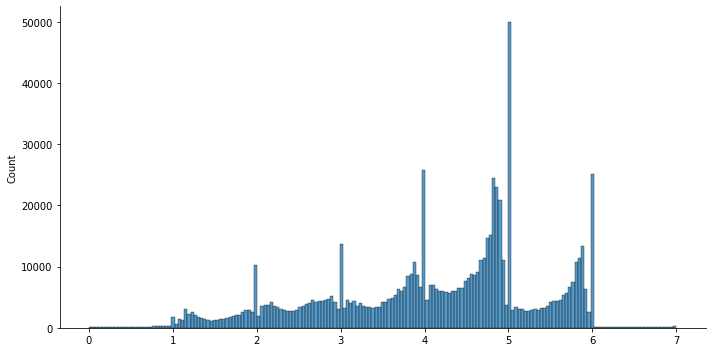

In [10]:
plt.figure()
sns.displot(data=rowwise_sum, kind='hist', height=5, aspect=2)
plt.show()

   - As can be seen from the histogram above, a large number of samples have been successfully matched (score of more than 4, 455750 rows from the two datasets)

In [11]:
probable_matches = compared_features_id_cosine_block[compared_features_id_cosine_block.loc[:, 'name':'postal_code'].sum(axis=1) > 4.0].reset_index()
probable_matches['Score'] = probable_matches.loc[:, 'name':'postal_code'].sum(axis=1)
probable_matches

,index,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code,Score
0,1,1,2281460,0.902708,1.000000,1.0,0.0,1.0,0,1,4.902708
1,2,3,3012091,0.929670,1.000000,1.0,0.0,1.0,1,0,4.929670
2,4,5,3200698,1.000000,0.836660,1.0,0.0,1.0,1,0,4.836660
3,5,6,3016840,0.710669,1.000000,1.0,0.0,1.0,1,0,4.710669
4,7,9,1603475,0.335083,1.000000,1.0,0.0,1.0,1,0,4.335083
...,...,...,...,...,...,...,...,...,...,...,...
455745,781571,1773447,2599983,1.000000,0.808452,1.0,0.0,1.0,1,1,5.808452
455746,781573,1773449,1455102,1.000000,0.790569,1.0,0.0,1.0,1,0,4.790569
455747,781575,1773451,1455705,0.415945,1.000000,1.0,0.0,1.0,1,0,4.415945
455748,781576,1773453,1530243,1.000000,1.000000,1.0,0.0,1.0,1,0,5.000000


Creating lookup columns for the name and addresses of each probable match in the table above for easier interpretability and readability of entries

In [12]:
s1_cstr['source1_name_address_lookup'] = s1_cstr.apply(lambda row: create_name_address_lookup(row), axis=1)
s2_cstr_parsed['source2_name_address_lookup'] = s2_cstr_parsed.apply(lambda row: create_name_address_lookup(row), axis=1)

s1_cstr.to_csv(os.path.join(ROOT, 'data', 'source1_cstr.csv'), index=False)
s2_cstr_parsed.to_csv(os.path.join(ROOT, 'data', 'source2_cstr_parsedaddress.csv'), index=False)

In [16]:
s1_lookup = s1_cstr[['source1_name_address_lookup']]
s2_lookup = s2_cstr_parsed[['source2_name_address_lookup']]

probable_matches_ = pd.merge(probable_matches, s1_lookup, left_on='Unnamed: 0', right_index=True)
probable_matches_ = pd.merge(probable_matches_, s2_lookup, left_on='Unnamed: 1', right_index=True)

#display(s1_lookup)#.iloc[1773447])
display(probable_matches_)

,index,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code,Score,source1_name_address_lookup,source2_name_address_lookup
0,1,1,2281460,0.902708,1.000000,1.0,0.0,1.0,0,1,4.902708,societe des sucreries du marquenterre nan rte ...,sucreries du marquenterre nan rte nationale na...
1,2,3,3012091,0.929670,1.000000,1.0,0.0,1.0,1,0,4.929670,hernas cartonnage 50.0 rue pasteur nan 80210 f...,hernas cartonnage sas 50.0 rue pasteur nan 802...
2,4,5,3200698,1.000000,0.836660,1.0,0.0,1.0,1,0,4.836660,prospa 3.0 rue du 43 ric nan 80510 longpre les...,prospa 3.0 rue 43 ric nan 80510 longpre les co...
3,5,6,3016840,0.710669,1.000000,1.0,0.0,1.0,1,0,4.710669,etablissements adrien riquier 12.0 rue henri b...,riquier adrien sa 12.0 rue henri barbusse nan ...
4,7,9,1603475,0.335083,1.000000,1.0,0.0,1.0,1,0,4.335083,cisn cooperative 13.0 av barbara nan 44570 tri...,cisn siege social trignac 13.0 av barbara nan ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455745,781571,1773447,2599983,1.000000,0.808452,1.0,0.0,1.0,1,1,5.808452,electro force 603.0 rue de la farniere zac d e...,electro force 603.0 rue farniere nan 69400.0 g...
455746,781573,1773449,1455102,1.000000,0.790569,1.0,0.0,1.0,1,0,4.790569,entreprise jean perraud et fils 38.0 rue de li...,entreprise jean perraud et fils 38.0 rue indus...
455747,781575,1773451,1455705,0.415945,1.000000,1.0,0.0,1.0,1,0,4.415945,entreprise jean perraud et fils 19.0 av victor...,groupe perraud 19.0 av victor hugo nan 38800 l...
455748,781576,1773453,1530243,1.000000,1.000000,1.0,0.0,1.0,1,0,5.000000,bijouterie dorey freres 27.0 rue jean jaures n...,bijouterie dorey freres 27.0 rue jean jaures n...


#### Sorting entries based on Score
Sorting row matches in source1 and source2 from highest match score to lowest score, we get:

In [23]:
probable_matches_.sort_values(by=['Score', 'Unnamed: 0', 'Unnamed: 1'], ascending=False)

,index,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code,Score,source1_name_address_lookup,source2_name_address_lookup
412699,717321,1532404,870362,1.0,1.0,1.0,1.0,1.0,1,1,7.0,agence blue ray 33.0 rue georges bernard la pe...,agence blue ray 33.0 rue georges bernard la pe...
336207,600624,1215813,238423,1.0,1.0,1.0,1.0,1.0,1,1,7.0,skema business school 60.0 rue dostoievski cam...,skema business school 60.0 rue dostoievski cam...
267555,489569,971631,240121,1.0,1.0,1.0,1.0,1.0,1,1,7.0,ha 59.0 bd sadi carnot chez abs 6110 le cannet,ha 59.0 bd sadi carnot chez abs 6110.0 le cannet
255011,469430,926917,1401364,1.0,1.0,1.0,1.0,1.0,1,1,7.0,rhumaliance 388.0 rue georges besse parc georg...,rhumaliance 388.0 rue georges besse parc georg...
203229,384008,748797,361925,1.0,1.0,1.0,1.0,1.0,1,1,7.0,cabinet mpf 12.0 rue ferdinand buisson parc at...,cabinet mpf 12.0 rue ferdinand buisson parc at...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,8816,49484,65066,1.0,1.0,1.0,0.0,1.0,0,0,4.0,college jules verne nan av joseph monat nan 32...,college jules verne nan av joseph monat nan 32...
5014,7875,46842,1339999,1.0,1.0,1.0,0.0,1.0,0,0,4.0,meteo france nan pl rene maret aerodrome de la...,meteo france nan pl rene maret nan 32000 auch
1676,3131,33631,3153330,1.0,1.0,1.0,0.0,1.0,0,0,4.0,bayi trucks 41.0 bd pierre lefaucheux zi sud 7...,bayi trucks 43.0 bd pierre lefaucheux nan 7210...
708,1326,30723,1682510,1.0,1.0,1.0,0.0,1.0,0,0,4.0,vicat 1350.0 av aristide briand 1176 a 1350 38...,vicat 1176.0 av aristide briand nan 38220 vizille


In [80]:
display(s1_cstr.loc[[426935]]) #['source2_name_address_lookup']
display(s2_cstr_parsed[s2_cstr_parsed['id'] == 38990291700019]) #['source2_name_address_lookup']
display(compared_features_id_cosine_block[compared_features_id_cosine_block['Unnamed: 1'] == 346816])
display(probable_matches_[probable_matches_['Unnamed: 1'] == 346816])

,id,name,street_number,street_type,street_name,address_line2,postal_code,city,source1_name_address_lookup
426935,38990291700019,janeli,NaN,av,de bamberg,NaN,12000,rodez,janeli nan av de bamberg nan 12000 rodez


,website,id,name,street_number,street_type,street_name,address_line2,postal_code,city,source2_name_address_lookup
346816,https://location.intermarche.com/site/,3.899029e+13,intermarche location rodez,NaN,av,NaN,NaN,12000.0,rodez,intermarche location rodez nan av nan nan 1200...
503674,https://location.intermarche.com,3.899029e+13,intermarche location rodez,NaN,av,NaN,NaN,12000,rodez,intermarche location rodez nan av nan nan 1200...
566976,http://www.intermarche.com/home.html,3.899029e+13,intermarche super,NaN,av,NaN,NaN,12000,rodez,intermarche super nan av nan nan 12000 rodez


,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
226343,426935,346816,0.0,0.0,1.0,0.0,1.0,0,1


,index,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code,Score,source1_name_address_lookup,source2_name_address_lookup


In [77]:
display(s1_cstr.loc[[1772837]])
display(s2_cstr_parsed[s2_cstr_parsed['id'] == 99785860000023])
display(compared_features_id_cosine_block[compared_features_id_cosine_block['Unnamed: 1'] == 2255597])
display(probable_matches_[probable_matches_['Unnamed: 1'] == 2255597])

,id,name,street_number,street_type,street_name,address_line2,postal_code,city,source1_name_address_lookup
1772837,99785860000023,societe de distribution du perche,NaN,lot,le tuilot,rte de remalard,61400,mortagne au perche,societe de distribution du perche nan lot le t...


,website,id,name,street_number,street_type,street_name,address_line2,postal_code,city,source2_name_address_lookup
2255547,http://www.intermarche.com/home.html,9.978586e+13,intermarche station service,NaN,rte,de remalard lieu dit tuilot,NaN,61400.0,mortagne au perche,intermarche station service nan rte de remalar...
2255597,NaN,9.978586e+13,intermarche,NaN,rte,de remalard lieu dit tuilot,NaN,61400.0,mortagne au perche,intermarche nan rte de remalard lieu dit tuilo...


,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
781101,1772837,2255597,0.340503,0.559017,0.0,0.0,1.0,0,1


,index,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code,Score,source1_name_address_lookup,source2_name_address_lookup


Even when the IDs do match, this library can give us an estimate of how well the entries themselves match, besides the numeric value of ID

### Using Jarowinkler metric with Block Indexing

Results below are from using Jarowinkler similarity metric for string match in the two tables, with a threshold of 0.85 i.e., if the similarity metric is above 0.85, the strings are considered to be matched (1.0) and unmatched (0.0) otherwise.

   - The Jarowinkler metric

In [33]:
compared_features_id_jw_block = pd.read_csv(os.path.join(ROOT, 'data', 'compared_features_id_block_jarowinkler_0.85.csv'))
display(compared_features_id_jw_block)

,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
0,0,3201056,0.0,1.0,1.0,0.0,1.0,0,0
1,1,2281460,0.0,1.0,1.0,0.0,1.0,0,1
2,3,3012091,1.0,1.0,1.0,0.0,1.0,1,0
3,4,3026062,1.0,0.0,0.0,0.0,1.0,0,0
4,5,3200698,1.0,0.0,1.0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...
781574,1773450,1472477,0.0,1.0,0.0,0.0,1.0,0,0
781575,1773451,1455705,0.0,1.0,1.0,0.0,1.0,1,0
781576,1773453,1530243,1.0,1.0,1.0,0.0,1.0,1,0
781577,1773454,2024616,0.0,0.0,0.0,0.0,1.0,0,0


In [36]:
rowwise_sum_ = compared_features_id_jw_block.loc[:, 'name':'postal_code'].sum(axis=1)
#display(rowwise_sum)
rowwise_sum_[rowwise_sum_ >= 4.0]

1         4.0
2         5.0
4         4.0
5         4.0
7         4.0
         ... 
781571    5.0
781573    5.0
781575    4.0
781576    5.0
781578    4.0
Length: 452734, dtype: float64

<Figure size 432x288 with 0 Axes>

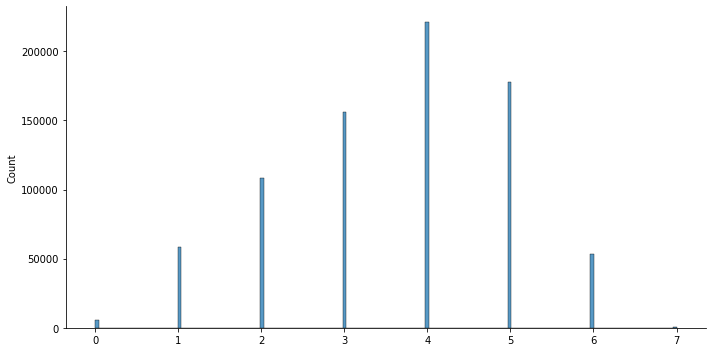

In [37]:
plt.figure()
sns.displot(data=rowwise_sum_, kind='hist', height=5, aspect=2)
plt.show()

   - As can be seen from the histogram above, a large number of samples have been successfully matched (score of more than 4, 455750 rows from the two datasets)

## Results – Matching rows using recordlinkage (NOT based on IDs)

### cosine metric

In [10]:
compared_features_cosine_block = pd.read_csv(os.path.join(ROOT, 'data', 'compared_features_block_cosine_None.csv'))
display(compared_features_cosine_block)

,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
0,4,3026062,1.0,0.781736,-1.0,-1.00000,1.0,-1,0
1,5,3200698,1.0,0.836660,1.0,-1.00000,1.0,1,0
2,15,3127510,1.0,0.632456,1.0,-1.00000,1.0,-1,0
3,22,3015012,1.0,1.000000,-1.0,-1.00000,1.0,-1,0
4,25,3022041,1.0,0.868243,1.0,-1.00000,1.0,1,0
...,...,...,...,...,...,...,...,...,...
336187,1825704,2653279,1.0,0.000000,0.5,-1.00000,1.0,0,0
336188,1825713,2606481,1.0,0.204124,0.0,-1.00000,1.0,0,1
336189,1825748,1218962,1.0,0.910182,1.0,0.80829,1.0,0,0
336190,1825749,555298,1.0,0.836660,1.0,-1.00000,1.0,0,0


In [11]:
compared_features_cosine_sorted = pd.read_csv(os.path.join(ROOT, 'data', 'compared_features_sorted_neighborhood_cosine_None.csv'))
display(compared_features_cosine_sorted)

,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
0,3,3012091,0.929670,1.000000,1.0,-1.0,1.0,1,0
1,9,1603531,0.393445,1.000000,1.0,-1.0,1.0,1,0
2,31,77979,0.879049,0.852803,-1.0,-1.0,1.0,-1,1
3,32,77979,0.879049,0.334497,0.0,-1.0,1.0,-1,1
4,117,1700862,0.906327,0.881917,-1.0,-1.0,1.0,-1,0
...,...,...,...,...,...,...,...,...,...
421293,1825514,546189,0.639602,0.000000,0.5,-1.0,1.0,0,0
421294,1825551,189372,0.842424,0.235702,0.0,-1.0,1.0,0,1
421295,1825726,1752605,0.738549,0.785714,1.0,-1.0,1.0,0,0
421296,1825964,3062434,0.596285,-1.000000,0.0,-1.0,1.0,0,0


### jarowinkler metric

In [12]:
compared_features_jw_block = pd.read_csv(os.path.join(ROOT, 'data', 'compared_features_block_jarowinkler_0.85.csv'))
display(compared_features_jw_block)

,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
0,4,3026062,1.0,0.0,-1.0,-1.0,1.0,-1,0
1,5,3200698,1.0,0.0,1.0,-1.0,1.0,1,0
2,15,3127510,1.0,0.0,1.0,-1.0,1.0,-1,0
3,22,3015012,1.0,1.0,-1.0,-1.0,1.0,-1,0
4,25,3022041,1.0,0.0,1.0,-1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...
336187,1825704,2653279,1.0,0.0,0.0,-1.0,1.0,0,0
336188,1825713,2606481,1.0,0.0,0.0,-1.0,1.0,0,1
336189,1825748,1218962,1.0,0.0,1.0,0.0,1.0,0,0
336190,1825749,555298,1.0,0.0,1.0,-1.0,1.0,0,0


In [13]:
compared_features_jw_sorted = pd.read_csv(os.path.join(ROOT, 'data', 'compared_features_sorted_neighborhood_jarowinkler_0.85.csv'))
display(compared_features_jw_sorted)

,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
0,3,3012091,1.0,1.0,1.0,-1.0,1.0,1,0
1,9,1603531,0.0,1.0,1.0,-1.0,1.0,1,0
2,31,77979,1.0,0.0,-1.0,-1.0,1.0,-1,1
3,32,77979,1.0,0.0,0.0,-1.0,1.0,-1,1
4,117,1700862,1.0,1.0,-1.0,-1.0,1.0,-1,0
...,...,...,...,...,...,...,...,...,...
421293,1825514,546189,1.0,0.0,0.0,-1.0,1.0,0,0
421294,1825551,189372,1.0,0.0,0.0,-1.0,1.0,0,1
421295,1825726,1752605,1.0,1.0,1.0,-1.0,1.0,0,0
421296,1825964,3062434,1.0,-1.0,0.0,-1.0,1.0,0,0


# ROUGH

In [23]:
compared_features_id_jw_sorted = pd.read_csv(os.path.join(ROOT, 'data', 'compared_features_id_sorted_neighborhood_jarowinkler_0.85.csv'))
display(compared_features_id_jw_sorted)

,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
0,3,3012091,1.0,1.0,1.0,-1.0,1.0,1,0
1,31,77979,1.0,0.0,-1.0,-1.0,1.0,-1,1
2,117,1700862,1.0,1.0,-1.0,-1.0,1.0,-1,0
3,131,674840,1.0,-1.0,-1.0,-1.0,1.0,-1,0
4,1191,481105,1.0,1.0,1.0,-1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...
337763,1772882,2947865,1.0,0.0,-1.0,-1.0,1.0,-1,1
337764,1772883,2405821,1.0,1.0,1.0,-1.0,1.0,-1,1
337765,1772896,2747684,1.0,0.0,1.0,-1.0,1.0,1,0
337766,1772912,257879,1.0,0.0,1.0,-1.0,1.0,1,1


### Cosine metric with Sorted Neighborhood Indexing

- Perfect matches are assigned value 1.0 and non-matches (incl. unmatched NANs) have been assigned a value of 0.
- The number of rows in the tables below equal to the number of rows in the two datasets where the `id` column has the same value.

In [24]:
compared_features_id_cosine_sorted = pd.read_csv(os.path.join(ROOT, 'data', 'compared_features_id_sorted_neighborhood_cosine_None.csv'))
display(compared_features_id_cosine_sorted)

,Unnamed: 0,Unnamed: 1,name,street_name,street_type,address_line2,city,street_number,postal_code
0,3,3012091,0.929670,1.000000,1.0,0.0,1.000000,1,0
1,31,77979,0.879049,0.852803,0.0,0.0,1.000000,0,1
2,117,1700862,0.906327,0.881917,0.0,0.0,1.000000,0,0
3,131,674840,0.938083,0.000000,0.0,0.0,1.000000,0,0
4,1191,481105,0.956183,1.000000,1.0,0.0,1.000000,1,0
...,...,...,...,...,...,...,...,...,...
337763,1772882,2947865,0.830540,0.204124,0.0,0.0,1.000000,0,1
337764,1772883,2405821,0.832050,1.000000,1.0,0.0,1.000000,0,1
337765,1772896,2747684,0.794719,0.852803,1.0,0.0,0.707107,1,0
337766,1772912,257879,0.891133,0.833333,1.0,0.0,1.000000,1,1


In [26]:
rowwise_sum_sorted = compared_features_id_cosine_sorted.loc[:, 'name':'postal_code'].sum(axis=1)
#display(rowwise_sum)
rowwise_sum_sorted[rowwise_sum_sorted > 4.0]

0         4.929670
4         4.956183
5         4.894427
6         4.804535
7         4.828266
            ...   
337757    4.599609
337764    4.832050
337765    4.354629
337766    5.724466
337767    4.880771
Length: 224005, dtype: float64

<Figure size 432x288 with 0 Axes>

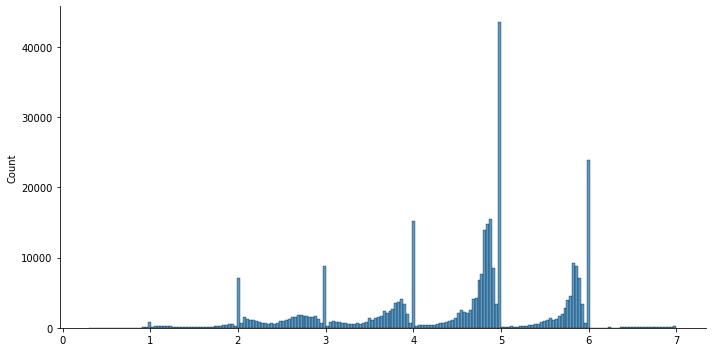

In [27]:
plt.figure()
sns.displot(data=rowwise_sum_sorted, kind='hist', height=5, aspect=2)
plt.show()

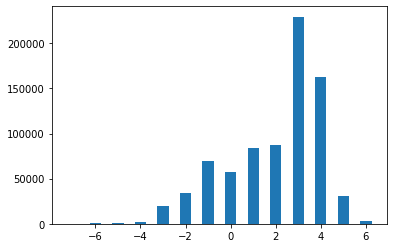

In [35]:
plt.figure()
y, binEdges = np.histogram(compared_features_id_cosine_block.loc[:, 'name':'postal_code'].sum(axis=1), 
                           bins=np.arange(-7,8))
plt.bar(binEdges[:-1], y, width=0.5)
#plt.hist(compared_features_id_cosine_block.loc[:, 'name':'postal_code'].sum(axis=1))
plt.show()